In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


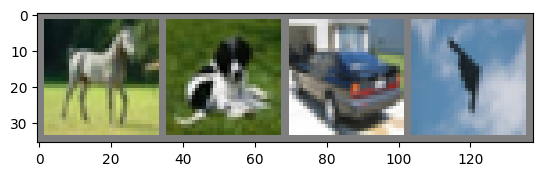

horse dog   car   plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
from torchsummary import summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [ ]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        new_labels = [[0.0 for tt in range(10)] for t in range(4)]
        for t in range(4):
          new_labels[t][labels[t]] = 1.0
        labels = torch.tensor(new_labels)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'tor

KeyboardInterrupt: ignored

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 40 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 46.6 %
Accuracy for class: car   is 50.7 %
Accuracy for class: bird  is 15.7 %
Accuracy for class: cat   is 12.5 %
Accuracy for class: deer  is 19.9 %
Accuracy for class: dog   is 35.3 %
Accuracy for class: frog  is 61.3 %
Accuracy for class: horse is 59.9 %
Accuracy for class: ship  is 45.0 %
Accuracy for class: truck is 58.0 %


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 데이터 전처리 및 데이터 로드
transform = transforms.Compose([
    transforms.ToTensor(),
])

# CIFAR-10 데이터셋 로드
cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# 데이터셋을 2x2 형태로 이어붙이기
def concatenate_images(dataset):
    concatenated_data = []
    for i in range(0, len(dataset), 4):  # 4개씩 묶어서 이어붙이기
        img1, _ = dataset[i]
        img2, _ = dataset[i + 1]
        img3, _ = dataset[i + 2]
        img4, _ = dataset[i + 3]

        concatenated_img = torch.cat([img1, img2, img3, img4], dim=2)
        concatenated_data.append((concatenated_img, 0))  # 레이블은 임의로 0 지정

    return concatenated_data

concatenated_train_data = concatenate_images(cifar_train)

# 이어붙인 데이터셋으로 DataLoader 생성
batch_size = 64
train_loader = DataLoader(concatenated_train_data, batch_size=batch_size, shuffle=True)

# 신경망 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 16 * 16 * 4, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 16 * 16 * 16 * 4)
        x = self.fc1(x)
        return x

# 모델, 손실 함수, 최적화 함수 정의
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 훈련
epochs = 5
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        '''print(outputs)
        print(labels)
        print(outputs.size())
        print(labels.size())'''
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print('훈련 완료')

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
])

# CIFAR-10 테스트 데이터셋 로드
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 테스트 데이터셋을 2x2 형태로 이어붙이기
def concatenate_images_test(dataset):
    concatenated_data = []
    for i in range(0, len(dataset), 4):  # 4개씩 묶어서 이어붙이기
        img1, _ = dataset[i]
        img2, _ = dataset[i + 1]
        img3, _ = dataset[i + 2]
        img4, _ = dataset[i + 3]

        concatenated_img = torch.cat([img1, img2, img3, img4], dim=2)
        concatenated_data.append((concatenated_img, 0))  # 클래스 인덱스는 여기서 중요하지 않습니다.

    return concatenated_data

concatenated_test_data = concatenate_images_test(cifar_test)

# 이어붙인 테스트 데이터셋으로 DataLoader 생성
batch_size = 64
test_loader = DataLoader(concatenated_test_data, batch_size=batch_size, shuffle=False)

# 모델 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 데이터 전처리 및 데이터 로드
transform = transforms.Compose([
    transforms.ToTensor(),
])

# CIFAR-10 데이터셋 로드
cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# 데이터셋을 2x2 형태로 이어붙이기
def concatenate_images(dataset):
    concatenated_data = []
    for i in range(0, len(dataset), 4):  # 4개씩 묶어서 이어붙이기
        img1, _ = dataset[i]
        img2, _ = dataset[i + 1]
        img3, _ = dataset[i + 2]
        img4, _ = dataset[i + 3]

        concatenated_img = torch.cat([img1, img2, img3, img4], dim=2)
        concatenated_data.append((concatenated_img, 1))  # 이진 분류를 위해 레이블을 1로 설정

    return concatenated_data

concatenated_train_data = concatenate_images(cifar_train)

# 이어붙인 데이터셋으로 DataLoader 생성
batch_size = 64
train_loader = DataLoader(concatenated_train_data, batch_size=batch_size, shuffle=True)

# 신경망 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 16 * 16, 1)  # 이진 분류를 위해 출력 크기를 1로 수정
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 16 * 16 * 16)
        x = self.fc1(x)
        x = self.sigmoid(x)  # Sigmoid 함수 적용
        return x

# 모델, 손실 함수, 최적화 함수 정의
model = SimpleCNN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 훈련
epochs = 5
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float().view(-1, 1))  # BCEWithLogitsLoss를 사용하므로 레이블을 float로 변환
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print('훈련 완료')

# 테스트
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # 0.5를 기준으로 이진 분류
        total += labels.size(0)
        correct += (predicted == labels.float().view(-1, 1)).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

In [ ]:
from torchvision import models
from torchsummary import summary

vgg = models.vgg16()
summary(model.vgg16(), (3, 32, 32))


In [ ]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
pip install saver

In [ ]:
!pip show utils

Name: utils
Version: 1.0.1
Summary: A grab-bag of utility functions and objects
Home-page: http://github.com/haaksmash/pyutils
Author: Haak Saxberg
Author-email: haak.erling@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
pip list

In [ ]:
pip install data

In [ ]:
!git clone https://github.com/zshicode/GNN-for-text-classification.git
%cd GNN-for-text-classification/
%ls

Cloning into 'GNN-for-text-classification'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 36 (delta 3), reused 31 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 1.52 MiB | 8.16 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/GNN-for-text-classification
config.py  data/  main.py  models/  preprocess/  README.md  result/  utils/


In [ ]:
import sys
sys.path.append('./GNN-for-text-classification/')

In [ ]:

import torchvision
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from torch import nn
from torchvision.models import vgg19

import os
import argparse
from tqdm import tqdm

# Data
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
train_trans = transforms.Compose([transforms.Resize(321),
                                  transforms.RandomCrop(224),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ToTensor(),
                                  normalize,
                                  ])
val_trans = transforms.Compose([transforms.Resize(321),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                normalize,
                                ])
# CIFAR-10 데이터셋 로드
cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_trans)

# 데이터셋을 2x2 형태로 이어붙이기
def concatenate_images(dataset):
    concatenated_data = []
    for i in range(0, len(dataset), 4):  # 4개씩 묶어서 이어붙이기
        img1, _ = dataset[i]
        img2, _ = dataset[i + 1]
        img3, _ = dataset[i + 2]
        img4, _ = dataset[i + 3]

        concatenated_img = torch.cat([img1, img2, img3, img4], dim=2)
        concatenated_data.append((concatenated_img, 0))  # 레이블은 임의로 0 지정

    return concatenated_data

train_ds = concatenate_images(cifar_train)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=4, drop_last=True)
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=val_trans)

# 테스트 데이터셋을 2x2 형태로 이어붙이기
def concatenate_images_test(dataset):
    concatenated_data = []
    for i in range(0, len(dataset), 4):  # 4개씩 묶어서 이어붙이기
        img1, _ = dataset[i]
        img2, _ = dataset[i + 1]
        img3, _ = dataset[i + 2]
        img4, _ = dataset[i + 3]

        concatenated_img = torch.cat([img1, img2, img3, img4], dim=2)
        concatenated_data.append((concatenated_img, 0))  # 클래스 인덱스는 여기서 중요하지 않습니다.

    return concatenated_data

val_ds = concatenate_images_test(cifar_test)

# 이어붙인 테스트 데이터셋으로 DataLoader 생성
val_dl = DataLoader(val_ds, batch_size=8, shuffle=False)

# Model
model = vgg19(pretrained=True)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, train_ds.CLASSES)
model = model

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 20, gamma=0.2)
best_pred = 0

for epoch in range(11):
    model.train()
    scheduler.step()

    iterator = tqdm(train_dl)
    for batch_idx, (image, labels) in enumerate(iterator):
        image = image
        labels = labels

        predictions = model(image)

        loss = criterion(predictions, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        iterator.set_description(
            'Epoch [{epoch}/{epochs}] :: Loss {loss:.4f}'.format(epoch=epoch + 1, epochs=1000, loss=loss.item()))

    if epoch % 10 == 0:
        model.eval()

        iterator = tqdm(val_dl)

        for batch_idx, (image, labels) in enumerate(iterator):
            image = image
            labels = labels

            predictions = model(image)
            loss = criterion(predictions, labels)

            # Mulit GPU handling
            if type(predictions) is list:
                predictions = torch.cat(predictions)
            pred_soft = torch.sigmoid(predictions)
            pred_binary = pred_soft.gt(0.5).type(predictions.type())

            iterator.set_description(
                'Val :: Loss {loss:.4f}'.format(loss=loss.item()))



NameError: ignored

In [ ]:

import torchvision
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from torch import nn
from torchvision.models import vgg19

import os
import argparse
from tqdm import tqdm

# Data
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
train_trans = transforms.Compose([transforms.Resize(321),
                                  transforms.RandomCrop(224),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ToTensor(),
                                  normalize,
                                  ])
val_trans = transforms.Compose([transforms.Resize(321),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                normalize,
                                ])
# CIFAR-10 데이터셋 로드
cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_trans)

# 데이터셋을 2x2 형태로 이어붙이기
def concatenate_images(dataset):
    concatenated_data = []
    for i in range(0, len(dataset), 4):  # 4개씩 묶어서 이어붙이기
        img1, _ = dataset[i]
        img2, _ = dataset[i + 1]
        img3, _ = dataset[i + 2]
        img4, _ = dataset[i + 3]

        concatenated_img = torch.cat([img1, img2, img3, img4], dim=2)
        concatenated_data.append((concatenated_img, 0))  # 레이블은 임의로 0 지정

    return concatenated_data

train_ds = concatenate_images(cifar_train)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=4, drop_last=True)
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=val_trans)

# 테스트 데이터셋을 2x2 형태로 이어붙이기
def concatenate_images_test(dataset):
    concatenated_data = []
    for i in range(0, len(dataset), 4):  # 4개씩 묶어서 이어붙이기
        img1, _ = dataset[i]
        img2, _ = dataset[i + 1]
        img3, _ = dataset[i + 2]
        img4, _ = dataset[i + 3]

        concatenated_img = torch.cat([img1, img2, img3, img4], dim=2)
        concatenated_data.append((concatenated_img, 0))  # 클래스 인덱스는 여기서 중요하지 않습니다.

    return concatenated_data

val_ds = concatenate_images_test(cifar_test)

# 이어붙인 테스트 데이터셋으로 DataLoader 생성
val_dl = DataLoader(val_ds, batch_size=8, shuffle=False)

# Model
model = vgg19(pretrained=True)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, train_ds.CLASSES)
model = model

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 20, gamma=0.2)
best_pred = 0

for epoch in range(11):
    model.train()
    scheduler.step()

    iterator = tqdm(train_dl)
    for batch_idx, (image, labels) in enumerate(iterator):
        image = image
        labels = labels

        predictions = model(image)

        loss = criterion(predictions, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        iterator.set_description(
            'Epoch [{epoch}/{epochs}] :: Loss {loss:.4f}'.format(epoch=epoch + 1, epochs=1000, loss=loss.item()))

    if epoch % 10 == 0:
        model.eval()

        iterator = tqdm(val_dl)

        for batch_idx, (image, labels) in enumerate(iterator):
            image = image
            labels = labels

            predictions = model(image)
            loss = criterion(predictions, labels)

            # Mulit GPU handling
            if type(predictions) is list:
                predictions = torch.cat(predictions)
            pred_soft = torch.sigmoid(predictions)
            pred_binary = pred_soft.gt(0.5).type(predictions.type())

            iterator.set_description(
                'Val :: Loss {loss:.4f}'.format(loss=loss.item()))



NameError: ignored